In [17]:
import requests
from xml.etree import ElementTree
from collections import defaultdict
import numpy as np
import pandas as pd
import statistics
import math
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import json
import urllib.request
import escher
from escher import Builder
import cobra
import time
from time import sleep

In [18]:
simData = np.load(r"../../out/geneRxnVerifData/output.npy", allow_pickle=True, encoding='ASCII')
fluxesWithCaption = simData.tolist()['agents']['0']['listeners']['fba_results']['estimated_fluxes']
complexes = simData.tolist()['agents']['0']['bulk']

ecData = pd.read_csv(r"../new genes/geneData.txt")
ecReactions = ecData["reactionID"].values.tolist()
temp = []
for word in ecReactions:
    if not word == "No Reaction Found":
        temp.append(word)
ecReactions = temp

metabolData = np.load(r"../../out/geneRxnVerifData/stoichiometry.npy", allow_pickle=True, encoding='ASCII')
rxn_metabolites = metabolData.tolist()

In [19]:
data = np.load("10thLevelCarbonReactions.npy", allow_pickle=True).tolist()

In [20]:
%run Viz_Functions.ipynb

In [21]:
fluxes = {}

for rxn in data:
    fluxes[rxn] = fluxesWithCaption[rxn]

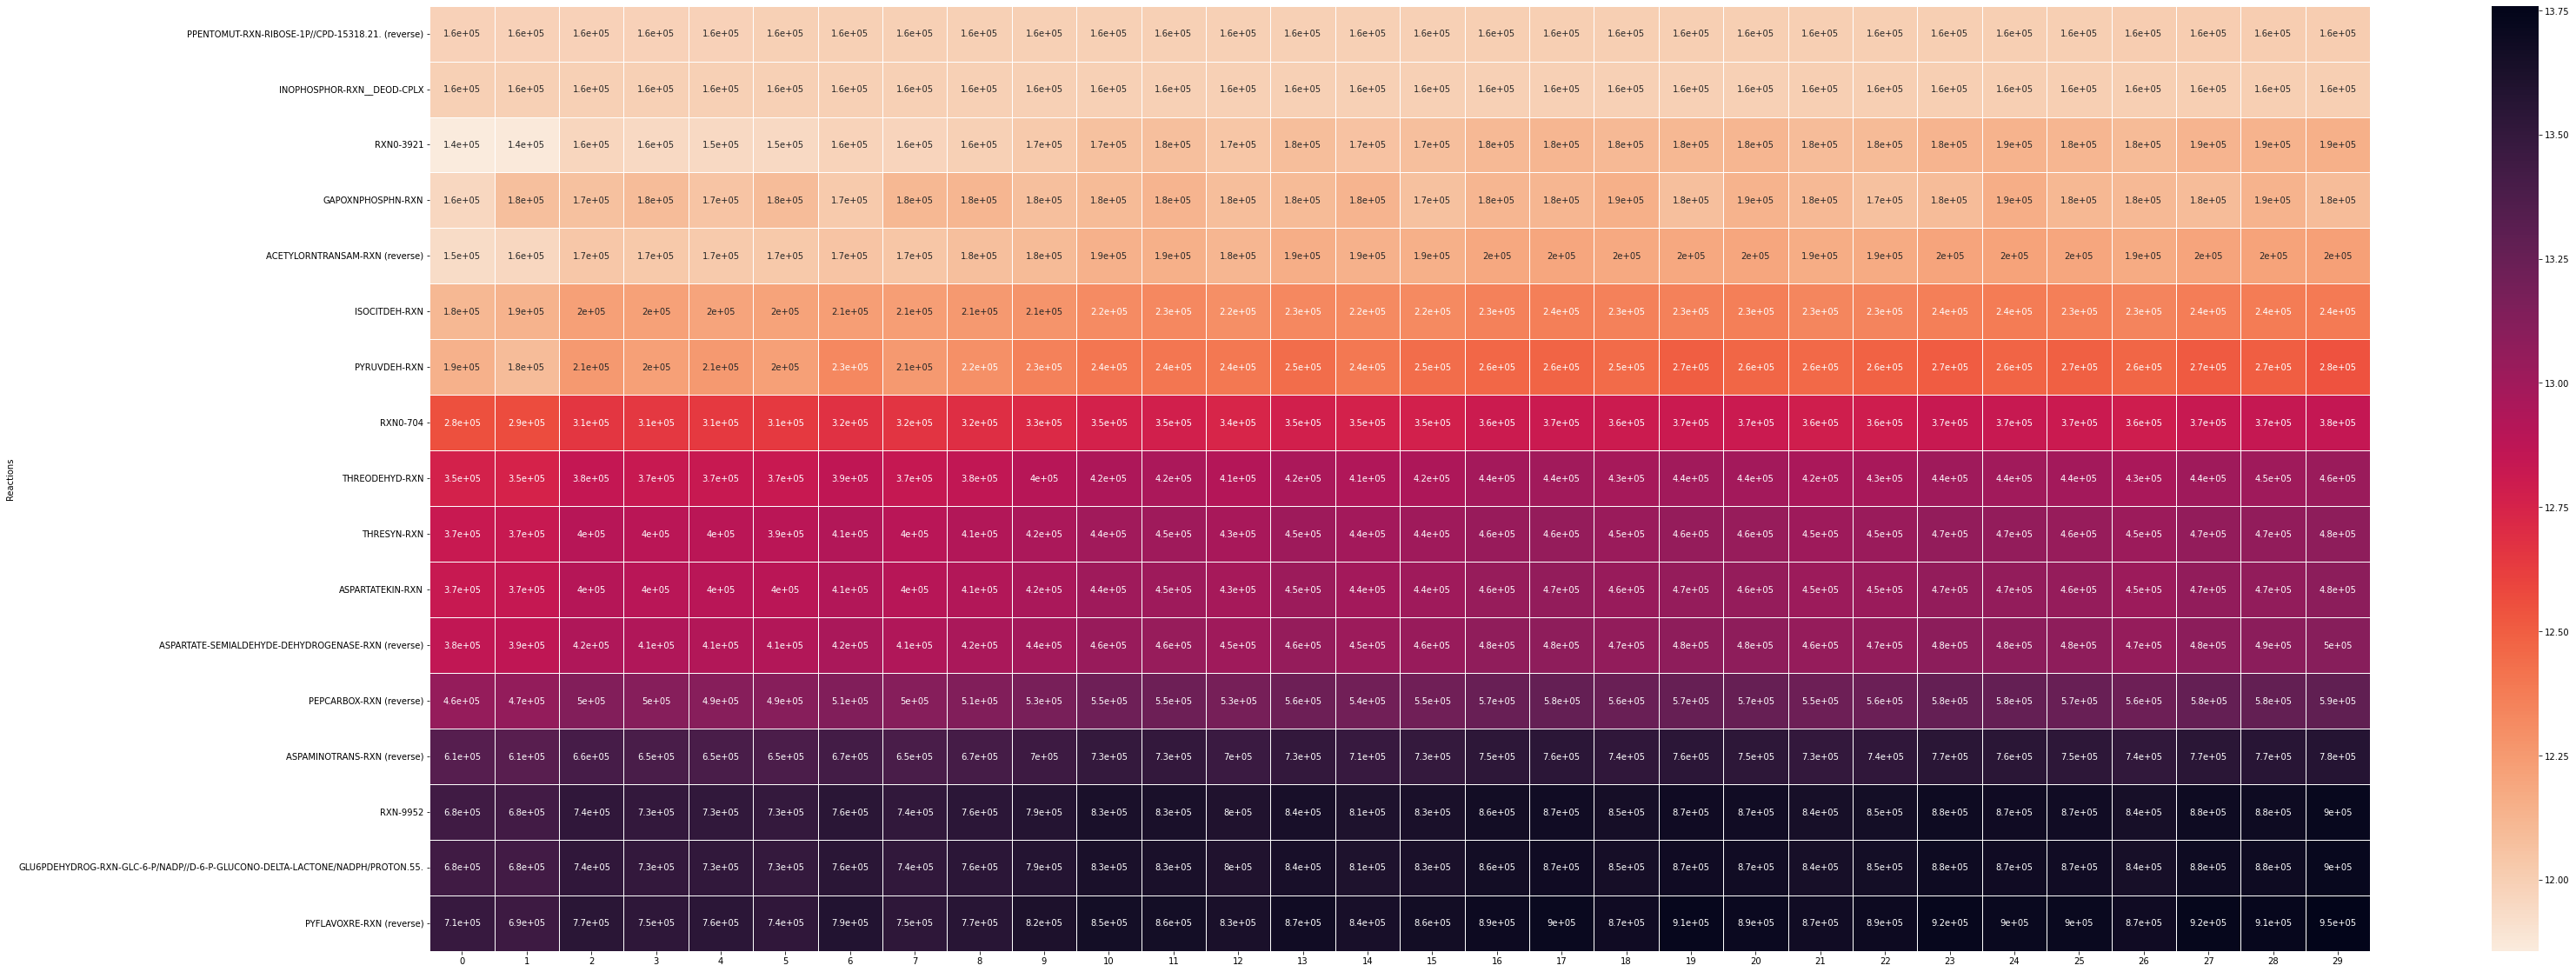

In [23]:
createHeatMapFluxes(fluxes, 20, True)